In [7]:
# import necessary packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [10]:
# display images with the given title
def display_img(img_name, title, gray=True):
    if gray:
        plt.imshow(img_name, vmin=0, vmax=255, cmap="gray")
    else:
        plt.imshow(img_name.astype('uint8'),vmin=0,vmax=255)
    plt.title(title)
    plt.show()

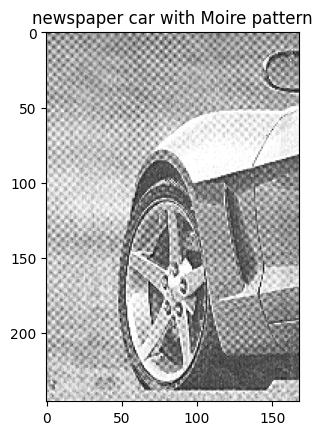

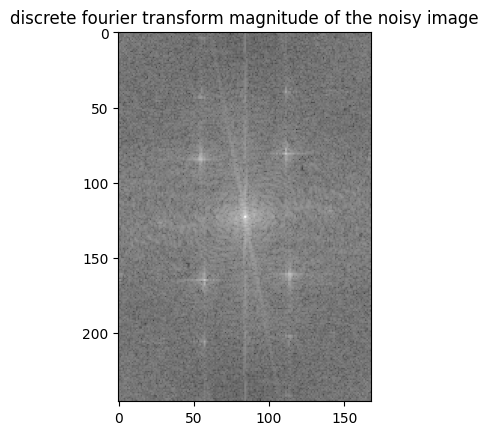

In [18]:
# read the newspaper image
img_newspaper_name="car_newsprint.tif"
Img_newspaper=cv2.imread("./../images/"+img_newspaper_name, cv2.IMREAD_GRAYSCALE)
display_img(Img_newspaper,"newspaper car with Moire pattern",True)

def show_DFT_magnitude(img_fft_shift, title):
    # compute the fourier transform of the newspaper image 
    # img_fft = np.fft.fft2(img)
    # shift the center
    # img_fft_shift = np.fft.fftshift(img_fft)
    plt.imshow(np.abs(img_fft_shift), cmap="gray", norm=LogNorm(vmin=5))
    plt.title(title)
    plt.show()


# compute the fourier transform of the newspaper image 
Img_newspaper_fft = np.fft.fft2(Img_newspaper)
# shift the center
Img_newspaper_fft_shift = np.fft.fftshift(Img_newspaper_fft)
show_DFT_magnitude(Img_newspaper_fft_shift,"discrete fourier transform magnitude of the noisy image")

In [19]:
# use the notch filter to restore the image

# implement Butterworth high pass filter
def BHPF(M, N, D0, n, uk, vk):
    H_BHPF = np.zeros((M, N))
    D = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            D[u, v] = np.sqrt((u - M / 2 - uk) ** 2 + (
                    v - N / 2 - vk) ** 2)  # euclidean distance from (u,v) to ((uk,vk) related to center)
            H_BHPF[u, v] = 1 / (1 + (D0 / D[u, v]) ** (2 * n))
    return H_BHPF


# implement Butterworth notch reject filter
def notchFilter(img, n, UV_set):  # n is the parameter of the Butterworth highpass filter
    # Q is the number of Butterworth highpass filter pairs
    M, N = img.shape
    # initialize the filter
    H_notch = np.zeros((M, N))
    length_set = len(UV_set)
    for i in range(length_set):
        uk, vk, D0 = UV_set[i]
        if i == 0:
            H_notch = BHPF(M, N, D0, n, uk, vk) * BHPF(M, N, D0, n, -uk, -vk)
        else:
            H_notch = H_notch * BHPF(M, N, D0, n, uk, vk) * BHPF(M, N, D0, n, -uk, -vk)
    return H_notch



C:\Users\Louis0326\AppData\Local\Temp\ipykernel_1188\3952497007.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  H_BHPF[u, v] = 1 / (1 + (D0 / D[u, v]) ** (2 * n))


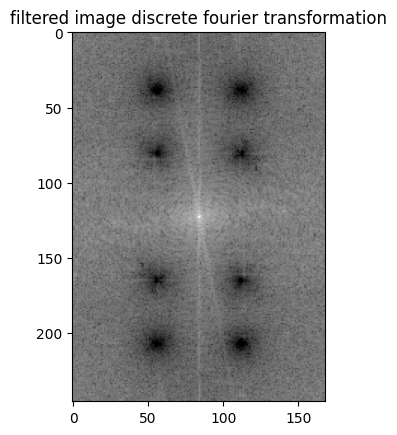

In [24]:
n=1.5
UV_set_newspaper = [(42, -28, 20), (84, -28, 20), (-42, -28, 20), (-84, -28, 20)]
# get the notch filter
Img_newspaper_notch=notchFilter(Img_newspaper, n, UV_set_newspaper)

# compute the fourier transform of the newspaper image 
Img_newspaper_fft=np.fft.fft2(Img_newspaper)
# shift the center
Img_newspaper_fft_shift=np.fft.fftshift(Img_newspaper_fft)

# use the filter the filter out the frequency of noise
Img_newspaper_fft_notch_restored=Img_newspaper_notch*Img_newspaper_fft_shift

show_DFT_magnitude(Img_newspaper_fft_notch_restored,"filtered image discrete fourier transformation")


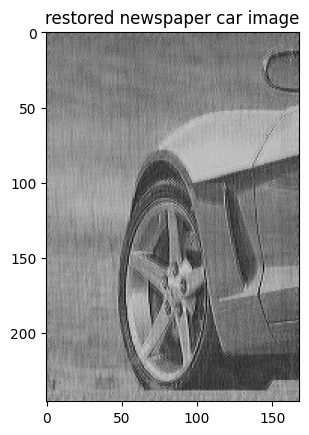

In [30]:
# after getting the filtered discrete fourier transformation, 
# use inverse fourier transformation to get the restored image
def img_ifft(img_fft_shift): 
    Img_inverse_fft_shift = np.fft.ifftshift(img_fft_shift)
    Img_inverse_fft=np.fft.ifft2(Img_inverse_fft_shift)
    Img_inverse_fft=np.abs(Img_inverse_fft)
    return Img_inverse_fft
Img_newspaper_restored=img_ifft(Img_newspaper_fft_notch_restored)
display_img(Img_newspaper_restored,"restored newspaper car image",True)